# Data Preprocessing

The data is formatted as JSON separated by newline. Using pandas to read dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_json("./Software_5.json", lines=True)


The feature `vote` tells us if the review is helpful or not. To better classifying our data, we want to remove all reviews that have no vote

In [20]:
dataframe = dataframe[dataframe['vote'].notna()]

For feature `reviewText`, we want to do some pre processing steps on the text

In [21]:
import string
from sklearn.feature_extraction import text

# Clean text, remove stop words and punctuation

dataframe["reviewText"].apply(str.lower)

2        if you've been wanting to learn how to create ...
8        i have also taken a local community college on...
9        even though i use dreamweaver a great deal and...
10       i waited to complete the entire course before ...
12       adobe approved "adobe photoshop lightroom 3, l...
                               ...                        
12747    there are a couple things i would like to see ...
12767    (3.5 stars) i got this software for basic book...
12768    the newest trend in software is to sell you a ...
12797    when you get started and you eard of lightroom...
12798    i feel like this software is a good balance of...
Name: reviewText, Length: 3902, dtype: object

Each review is assigned an overall score from 1.0 to 5.0. Convert those scores to labels where -1 is negative, 0 is neutral and 1 is positive

In [28]:
def sentiment_from_overall(number):
    if number < 3.0:
        return -1
    if number == 3.0:
        return 0
    return 1

dataframe["sentiment"] = dataframe["overall"].apply(sentiment_from_overall)

# Visualization

Exploratory data analysis on overall rating column

In [8]:
dataframe["overall"].describe()


count    3902.000000
mean        3.367760
std         1.557351
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: overall, dtype: float64

Plotting pie chart and bar chart for overall score distribution. The 'overall' column has 5 labels: 1.0, 2.0, 3.0, 4.0, 5.0 where 1.0 is very bad, 3.0 is neutral and 5.0 is very good.

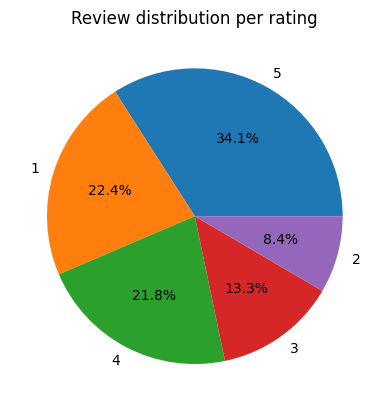

<AxesSubplot: title={'center': 'Review count per rating'}>

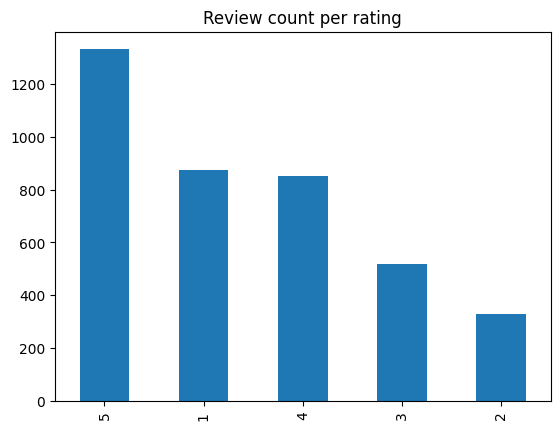

In [30]:
scores = dataframe["overall"].value_counts()
index = scores.index.to_numpy()
scores = scores.to_numpy()
plt.pie(scores, labels=index, autopct='%1.1f%%')
plt.title("Review distribution per rating")
plt.show()
dataframe['overall'].value_counts().plot(kind='bar',title="Review count per rating")


We get the same statistic, but this time with sentiment

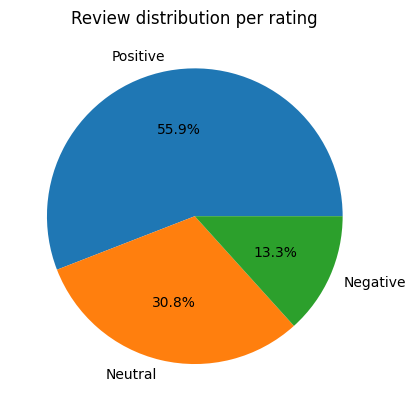

<AxesSubplot: title={'center': 'Review count per rating'}>

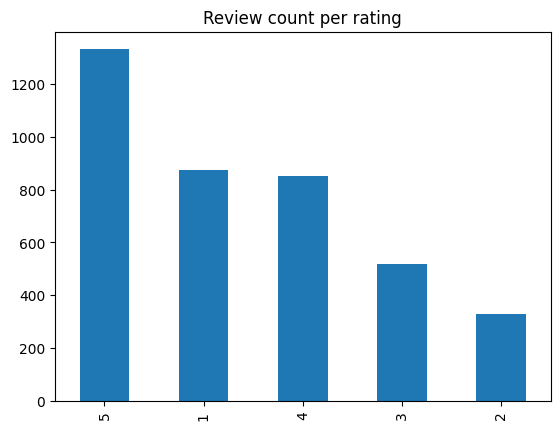

In [36]:
def sentiment_to_word(number):
    if number == 1:
        return "Positive"
    if number == 0:
        return "Negative"
    return "Neutral"

scores = dataframe["sentiment"].value_counts()
index = [sentiment_to_word(x) for x in scores.index.to_numpy()]
scores = scores.to_numpy()
plt.pie(scores, labels=index, autopct='%1.1f%%')
plt.title("Review distribution per rating")
plt.show()
dataframe['overall'].value_counts().plot(kind='bar',title="Review count per rating")


def sentiment_to_word(number):
    if number == 0:
        return "Negative"
    if number == 1:
        return "Positive"
    return "Neutral"

scores = dataframe["sentiment"].value_counts()
index = scores.index.to_numpy().apply(sentiment_to_word)
scores = scores.to_numpy()

plt.pie(scores, labels=index, autopct='%1.1f%%')
plt.title("Review distribution per sentiment")
plt.show()

Now, we get statistics on reivewText length. To visualize this, we use a boxplot

Statistic of text length
 count     3902.000000
mean      1737.686315
std       2085.069985
min          3.000000
25%        562.250000
50%       1139.500000
75%       2197.500000
max      31643.000000
Name: reviewText, dtype: float64


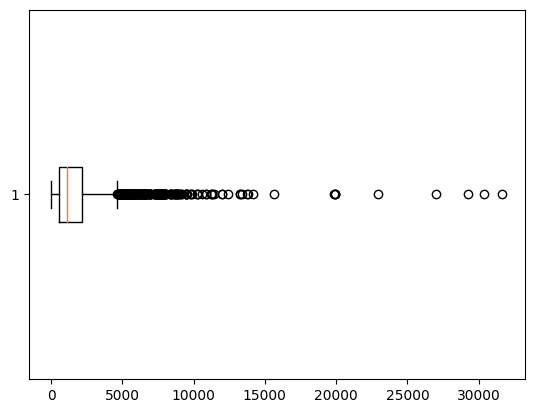

In [11]:
text_length = dataframe["reviewText"].apply(len)
print("Statistic of text length\n", text_length.describe())
# To visualize this, we use boxplot
plt.boxplot(text_length, vert=False)
plt.show()
